In [2]:
path="train.csv"

In [11]:
import warnings

from sklearn import linear_model
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
df = pd.read_csv(path)
df.head(10000)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0.31,Premium,I,VS1,61.1,60.0,4.35,4.32,2.66,544
9996,9996,2.20,Premium,J,SI2,62.6,59.0,8.31,8.25,5.18,12787
9997,9997,2.05,Premium,D,SI2,58.8,59.0,8.32,8.26,4.93,10036
9998,9998,0.71,Ideal,E,VVS2,61.0,56.0,5.74,5.77,3.51,3271


In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns

df.corr()

,id,carat,depth,table,x,y,z,price
id,1.000000,-0.000771,0.002647,0.002448,-0.000476,-0.000448,0.000037,-0.001392
carat,-0.000771,1.000000,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
depth,0.002647,0.027852,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.002448,0.225737,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,-0.000476,0.980563,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,-0.000448,0.980161,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.000037,0.974274,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,-0.001392,0.943396,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X, y = df[['id','depth','table','x','y','z']], df.price
model.fit(X, y)
model.score(X, y)

0.8136929257304446

In [15]:
or_data = pd.read_csv(path)
or_data.head()
print(or_data['cut'].value_counts())
print(or_data['color'].value_counts())

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64


In [16]:
or_data.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [18]:
or_data.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [20]:
or_data.corr()['carat']

id      -0.000771
carat    1.000000
depth    0.027852
table    0.225737
x        0.980563
y        0.980161
z        0.974274
price    0.943396
Name: carat, dtype: float64

<AxesSubplot:>

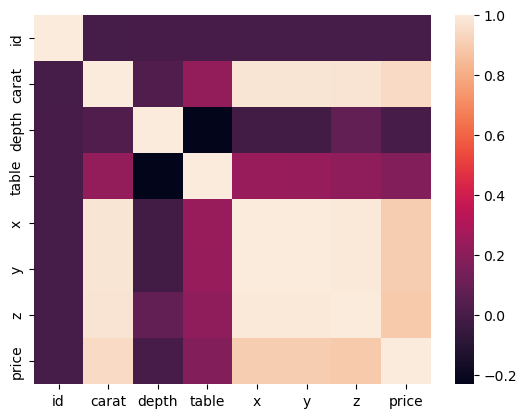

In [21]:
cor = or_data.corr()
sns.heatmap(cor)

In [33]:
or_data.drop('cut',axis = 1 , inplace = True)
or_data.head()

,id,carat,color,clarity,depth,table,y,z,price
0,0,1.52,F,VS2,62.2,58.0,7.33,4.55,13619
1,1,2.03,J,SI2,62.0,58.0,8.12,5.05,13387
2,2,0.70,G,VS1,61.2,57.0,5.73,3.50,2772
3,3,0.32,G,VS1,61.6,56.0,4.41,2.71,666
4,4,1.70,G,VS2,62.6,59.0,7.61,4.77,14453


In [34]:
or_data = pd.get_dummies(data = or_data,drop_first=True)
or_data.head()

,id,carat,depth,table,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1.52,62.2,58.0,7.33,4.55,13619,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,2.03,62.0,58.0,8.12,5.05,13387,0,0,0,0,0,1,0,0,1,0,0,0,0
2,2,0.70,61.2,57.0,5.73,3.50,2772,0,0,1,0,0,0,0,0,0,1,0,0,0
3,3,0.32,61.6,56.0,4.41,2.71,666,0,0,1,0,0,0,0,0,0,1,0,0,0
4,4,1.70,62.6,59.0,7.61,4.77,14453,0,0,1,0,0,0,0,0,0,0,1,0,0


In [38]:
x = or_data.drop('color',axis = 1)
x.head()

KeyError: "['color'] not found in axis"

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print("X train: ",X_train.shape)
print("X test: ",X_test.shape)
print("Y train: ",Y_train.shape)
print("Y test: ",Y_test.shape)

NameError: name 'Y' is not defined

In [7]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.95, 
                                                    test_size = 0.05, random_state = 100)
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the predicted values
y_test_pred
lr.params

NameError: name 'X_train' is not defined

In [8]:
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

NameError: name 'y_test' is not defined

In [2]:
print(-3/5 (log(3/5) - 2/5) )

<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
C:\Users\madha\AppData\Local\Temp\ipykernel_11172\3343103443.py:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  print(-3/5 (log(3/5) - 2/5) )


NameError: name 'log' is not defined